In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, LpMinimize, lpSum, value

## Part 1

In [15]:
data = pd.read_excel('../Exercise3_data.xlsx').dropna().reset_index().drop('index',axis=1)

In [16]:
print(data)

       Unnamed: 0 Distance  Cost     LO Water   GWP  FWET  FWEU    HT  PMPF  \
0      BD20 algae     15.1   0.9   0.04  0.22  2.63  1.37  2.03  0.29  2.33   
1   BD20 Camelina     15.1  0.78   2.28  1.06  2.52  0.96   0.4  0.14   1.6   
2     BD20 canola     15.1  0.84   1.19  0.58  2.52  0.96  0.45  0.14  1.55   
3       BD20 corn     15.1  0.74   3.65  1.24   2.6  1.06  0.51  0.15  1.91   
4   BD20 Jatropha     15.1  0.74   1.09   0.5  2.56  1.06  0.45  0.15  1.71   
..            ...      ...   ...    ...   ...   ...   ...   ...   ...   ...   
67    RDII canola     14.6  1.03   6.07  2.96  0.31  0.83   0.7  0.12  0.92   
68      RDII corn     14.6  0.47   9.82   0.5  0.64  1.42  0.94  0.18  2.47   
69  RDII Jatropha     14.6  0.46   5.54  2.53  0.51  1.38  0.71  0.16  1.74   
70      RDII palm     14.6   0.7   2.79  9.02  0.23  0.77  0.45   0.1  1.07   
71       RDII soy     14.6  0.91  11.38  3.49  0.28  0.75   0.5  0.12  0.86   

    POFP    TA    TE  
0   6.32  5.45   0.9  
1   5

In [17]:
def normalize_data(column_name, dataframe):
    column = dataframe[column_name]
    max_column = max(column)
    min_column = min(column)
    column_new = (column - min_column)/(max_column-min_column)
    dataframe[column_name] = column_new
    return dataframe

In [18]:
print(data.columns.values[1::])

['Distance' 'Cost' 'LO' 'Water' 'GWP' 'FWET' 'FWEU' 'HT' 'PMPF' 'POFP'
 'TA' 'TE']


In [19]:
headers = data.columns.values[1::]
for i in range(len(headers)):
    data = normalize_data(headers[i],data)
print(data)

       Unnamed: 0  Distance      Cost        LO     Water       GWP      FWET  \
0      BD20 algae       1.0  0.661017  0.003428   0.02439   0.97166  0.324324   
1   BD20 Camelina       1.0  0.559322  0.195373  0.117517  0.927126  0.201201   
2     BD20 canola       1.0  0.610169  0.101971  0.064302  0.927126  0.201201   
3       BD20 corn       1.0  0.525424  0.312768  0.137472  0.959514  0.231231   
4   BD20 Jatropha       1.0  0.525424  0.093402  0.055432   0.94332  0.231231   
..            ...       ...       ...       ...       ...       ...       ...   
67    RDII canola  0.923077  0.771186  0.520137   0.32816  0.032389  0.162162   
68      RDII corn  0.923077   0.29661  0.841474  0.055432  0.165992  0.339339   
69  RDII Jatropha  0.923077  0.288136  0.474722  0.280488   0.11336  0.327327   
70      RDII palm  0.923077  0.491525  0.239075       1.0       0.0  0.144144   
71       RDII soy  0.923077  0.669492   0.97515  0.386918  0.020243  0.138138   

        FWEU        HT     

## Part 2

## Task i

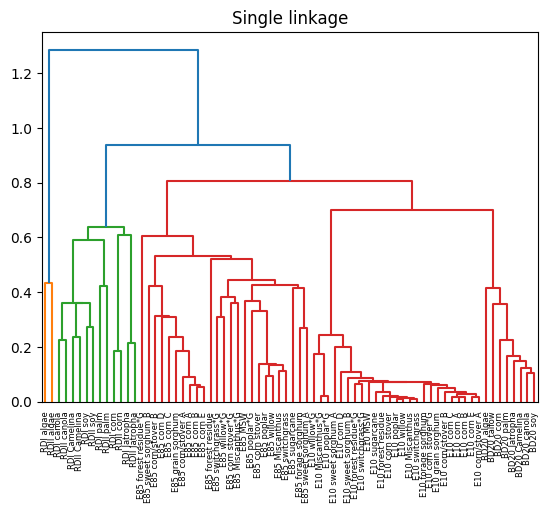

In [20]:
dropped_names = data.drop('Unnamed: 0',axis=1)
names = data['Unnamed: 0'].values

z=hierarchy.linkage(dropped_names,'single')
hierarchy.dendrogram(z,labels=names,leaf_rotation=90)
plt.title('Single linkage')
plt.show()

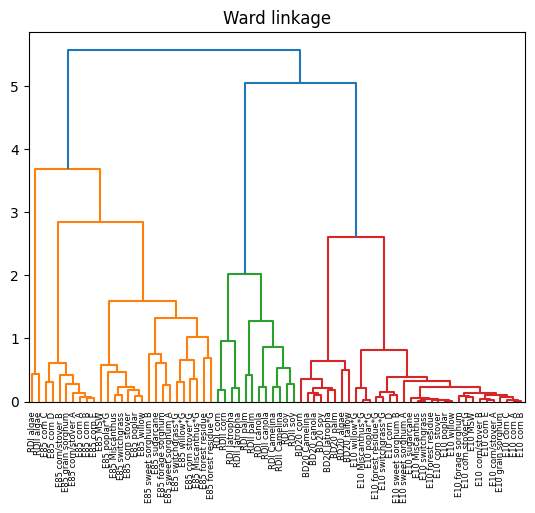

In [21]:
z=hierarchy.linkage(dropped_names,'ward')
hierarchy.dendrogram(z,labels=names,leaf_rotation=90)
plt.title('Ward linkage')
plt.show()

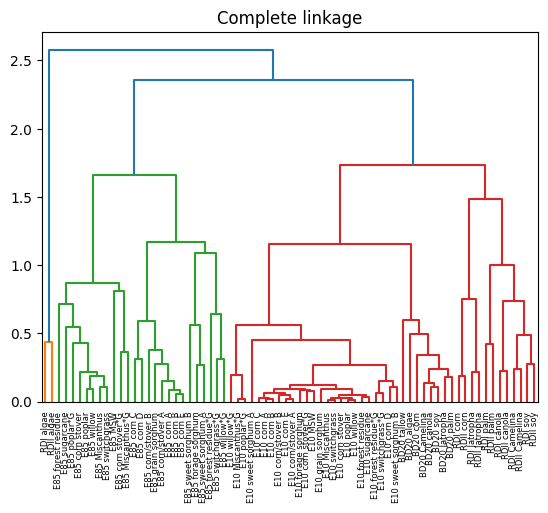

In [22]:
z=hierarchy.linkage(dropped_names,'complete')
hierarchy.dendrogram(z,labels=names,leaf_rotation=90)
plt.title('Complete linkage')
plt.show()

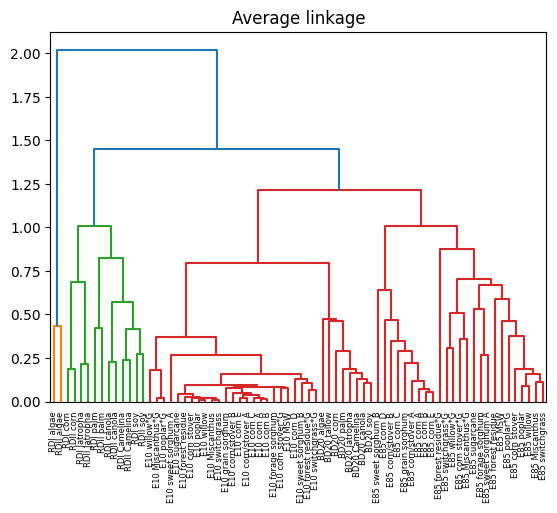

In [23]:
z=hierarchy.linkage(dropped_names,'average')
hierarchy.dendrogram(z,labels=names,leaf_rotation=90)
plt.title('Average linkage')
plt.show()

## Task ii / iii

Based on the single linkage it can be seen that the fuel types give different clusters, since they have somewhat similar properties. Since there are 5 fuel types involved (E85, E110, RDI, RDI algae, BD20), I would suggest 5 clusters. Looking e.g. at average linkage also leads to a similar result. This also gives the cluster labels already.

# Part 3

## Task i 

In [24]:
n_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
agg_labels = agg_clustering.fit_predict(dropped_names)
centroids = np.array([dropped_names[agg_labels == i].mean(axis=0) for i in range(n_clusters)])
print(centroids)

[[0.9230769230769232 0.46327683615819204 0.6441730934018851
  0.373429416112343 0.11673414304993253 0.20395395395395396
  0.05776736924277907 0.04746835443037975 0.14207317073170736
  0.2946969696969697 0.15623428858722976 0.4444444444444444]
 [0.0 0.17864406779661013 0.15578406169665812 0.14766740576496676
  0.3982186234817814 0.5268468468468468 0.14903981264637
  0.25518987341772154 0.338829268292683 0.5371515151515149
  0.6137556561085974 0.18157894736842095]
 [0.32307692307692293 0.48372881355932207 0.013127677806341047
  0.01942350332594235 0.9250202429149798 0.11159159159159157
  0.04505854800936768 0.029367088607594932 0.18682926829268298
  0.25569696969696964 0.47867269984917044 0.4284210526315789]
 [0.9230769230769231 0.9449152542372881 0.017994858611825194
  0.02716186252771619 0.3157894736842105 0.7702702702702702
  0.9197892271662763 0.9177215189873418 0.9097560975609755
  0.9106060606060606 0.8205128205128205 0.9429824561403508]
 [1.0 0.6101694915254237 0.12146529562982003

In [25]:
kmeans1 = KMeans(n_clusters=n_clusters, init=centroids, n_init=1)  
kmeans_labels_1 = kmeans1.fit_predict(dropped_names)

## Task ii

In [26]:
kmeans2 = KMeans(n_clusters=n_clusters, init='random',n_init=10)  
kmeans_labels_2 = kmeans2.fit_predict(dropped_names)

## Task iii

In [27]:
print(kmeans1.cluster_centers_)
cluster_members = {i: [] for i in range(n_clusters)}
for i, label in enumerate(kmeans_labels_1):
    cluster_members[label].append(names[i])
print("\nCluster Members:")
for cluster, members in cluster_members.items():
    print(f"Cluster {cluster}: {members}")

[[0.92307692 0.46327684 0.64417309 0.37342942 0.11673414 0.20395395
  0.05776737 0.04746835 0.14207317 0.29469697 0.15623429 0.44444444]
 [0.         0.17864407 0.15578406 0.14766741 0.39821862 0.52684685
  0.14903981 0.25518987 0.33882927 0.53715152 0.61375566 0.18157895]
 [0.32307692 0.48372881 0.01312768 0.0194235  0.92502024 0.11159159
  0.04505855 0.02936709 0.18682927 0.25569697 0.4786727  0.42842105]
 [0.92307692 0.94491525 0.01799486 0.02716186 0.31578947 0.77027027
  0.91978923 0.91772152 0.9097561  0.91060606 0.82051282 0.94298246]
 [1.         0.61016949 0.1214653  0.07677384 0.93674089 0.22034535
  0.06045082 0.09018987 0.23963415 0.41458333 0.50075415 0.59649123]]

Cluster Members:
Cluster 0: ['RDI Camelina', 'RDI canola', 'RDI corn', 'RDI\xa0Jatropha', 'RDI\xa0palm', 'RDI\xa0soy', 'RDII\xa0Camelina', 'RDII canola', 'RDII corn', 'RDII Jatropha', 'RDII palm', 'RDII soy']
Cluster 1: ['E85 corn A', 'E85 corn B', 'E85 corn C', 'E85 corn D', 'E85 corn E', 'E85 corn stover', 'E8

In this case, the clusters can be named after the fuel type, since each cluster only contains members from one fuel type: RDI, E85, E10, BD20. Only for the RDI fuels there is a difference between RDI algae, which forms its own cluster, and all other RDI fuels. 

In [28]:
print(kmeans2.cluster_centers_)
cluster_members = {i: [] for i in range(n_clusters)}
for i, label in enumerate(kmeans_labels_2):
    cluster_members[label].append(names[i])
print("\nCluster Members:")
for cluster, members in cluster_members.items():
    print(f"Cluster {cluster}: {members}")

[[ 9.23076923e-01  4.63276836e-01  6.44173093e-01  3.73429416e-01
   1.16734143e-01  2.03953954e-01  5.77673692e-02  4.74683544e-02
   1.42073171e-01  2.94696970e-01  1.56234289e-01  4.44444444e-01]
 [ 4.87179487e-01  5.14381099e-01  3.93913427e-02  3.33266143e-02
   9.27861612e-01  1.37956138e-01  4.87900078e-02  4.41120061e-02
   1.99630451e-01  2.94214876e-01  4.84025778e-01  4.69165338e-01]
 [-5.55111512e-17  2.52542373e-01  9.35732648e-02  1.29157428e-01
   6.66396761e-01  7.73873874e-01  2.42388759e-01  4.16455696e-01
   5.01463415e-01  7.23181818e-01  7.94570136e-01  2.19385965e-01]
 [ 9.23076923e-01  9.44915254e-01  1.79948586e-02  2.71618625e-02
   3.15789474e-01  7.70270270e-01  9.19789227e-01  9.17721519e-01
   9.09756098e-01  9.10606061e-01  8.20512821e-01  9.42982456e-01]
 [ 1.11022302e-16  1.29378531e-01  1.97257926e-01  1.60007391e-01
   2.19433198e-01  3.62162162e-01  8.68071819e-02  1.47679325e-01
   2.30406504e-01  4.13131313e-01  4.93212670e-01  1.56374269e-01]]

Clu

Here, again the fuel types form their own clusters. However, BD20 fuels and E10 fuels are very similar, which makes sense based on the percentage of bioproducts contained in the fuel (10% and 20% respectively). Again, RDI sourced from algae forms its own cluster, while all other RDI fuels are in another cluster. With this algorithm, E85 fuels are in two different clusters. There is no obvious difference between these two clusters based on the sourced material. 

# Part 4

## Task i

In [29]:
names = data.iloc[:, 0]
X = data.iloc[:, 1:13].values
n_DMUs = X.shape[0]
n_inputs = X.shape[1]

eff_scores = []
lambda_table = []
slack_table = []

for k in range(n_DMUs):
    prob = LpProblem(f"DEA_Dual_DMUk_{k+1}", LpMinimize)
    lamda = LpVariable.dicts("lamda", range(n_DMUs), lowBound=0, cat="Continuous")
    slack = LpVariable.dicts("slack", range(n_inputs), lowBound=0, cat="Continuous")
    z = LpVariable("z", lowBound=None, cat="Continuous")
    prob += z
    for i in range(n_inputs):
        lhs = lpSum([lamda[j] * X[j][i] for j in range(n_DMUs)]) + slack[i]
        rhs = z * X[k][i]
        prob += lhs == rhs, f"InputConstraint_{i+1}"
    prob += lpSum([lamda[j] for j in range(n_DMUs)]) == 1, "Convexity"
    prob.solve()
    eff = value(z)
    eff_scores.append(eff)
    lambdas = [value(lamda[j]) for j in range(n_DMUs)]
    lambda_table.append(lambdas)
    slacks = [value(slack[i]) for i in range(n_inputs)]
    slack_table.append(slacks)

results_df = pd.DataFrame({
    "DMU": names,
    "Efficiency": eff_scores,
    "Efficient": [round(eff_scores[i], 5) == 1.0 and all(round(s, 5) == 0 for s in slack_table[i]) for i in range(n_DMUs)]
})
slack_df = pd.DataFrame(slack_table, columns=[f"Slack_{i+1}" for i in range(n_inputs)])
results_df = pd.concat([results_df, slack_df], axis=1)
lambda_df = pd.DataFrame(lambda_table, columns=[f"Lambda_{j+1}" for j in range(n_DMUs)])
lambda_df.insert(0, "DMU", names)
results_df = pd.concat([results_df,lambda_df],axis=1)

In [30]:
results_df

,DMU,Efficiency,Efficient,Slack_1,Slack_2,Slack_3,Slack_4,Slack_5,Slack_6,Slack_7,...,Lambda_63,Lambda_64,Lambda_65,Lambda_66,Lambda_67,Lambda_68,Lambda_69,Lambda_70,Lambda_71,Lambda_72
0,BD20 algae,0.548178,False,0.396539,0.055704,0.000000,0.000000,0.000000,0.0,0.077729,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,BD20 Camelina,0.775056,False,0.495937,0.017996,0.000000,0.046155,0.000000,0.0,0.000000,...,0.0,0.0,0.022148,0.0,0.0,0.0,0.0,0.0,0.00445,0.0
2,BD20 canola,0.750406,False,0.453795,0.030184,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.056830,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,BD20 corn,0.691217,False,0.471495,0.000000,0.077257,0.033523,0.015032,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,BD20 Jatropha,0.747144,False,0.505994,0.000000,0.000000,0.009427,0.005743,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,RDII canola,1.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.00000,0.0
68,RDII corn,1.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.00000,0.0
69,RDII Jatropha,1.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.00000,0.0
70,RDII palm,1.000000,True,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.00000,0.0


In [31]:
np.array(results_df['Efficiency'])

array([0.54817847, 0.77505589, 0.75040615, 0.69121749, 0.74714381,
       0.80571575, 1.        , 0.97135494, 0.9397803 , 0.94848838,
       0.96181776, 0.73771815, 0.88819304, 0.99062452, 0.85802498,
       0.93604033, 0.86524551, 0.90872454, 1.        , 0.86832119,
       0.87586165, 0.97947717, 0.92304308, 1.        , 0.99797452,
       0.94410982, 0.99161426, 1.        , 0.80826898, 0.95964406,
       0.84260521, 1.        , 1.        , 0.60790696, 0.60790696,
       0.48878507, 0.37060296, 0.55987981, 1.        , 1.        ,
       0.62727019, 0.42687747, 0.69278351, 1.        , 1.        ,
       0.59021752, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.90223539, 0.74636338, 0.49166449, 0.99620887,
       0.80438825, 1.        , 1.        , 0.62850851, 1.        ,
       1.        , 0.67033817, 1.        , 1.        , 1.        ,
       0.78473196, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [32]:
results_df.to_csv("DEA_Input_Efficiency_Results.csv", index=False)

## Task ii

Entry number 5, BD20 Jatropha, is inefficient. The corresponding peer group consists of entries 28 (E10 Sweet Sorghum A), 33 (E10 Willow*G), 40 (E85 Corn Stover*G), 45 (E85 Forest Residue*G), and 49 (E85 MSW). The target values are: 

In [33]:
lambda_array = [results_df.loc[4]['Lambda_28'],results_df.loc[4]['Lambda_33'],results_df.loc[4]['Lambda_40'],results_df.loc[4]['Lambda_45'],results_df.loc[4]['Lambda_49']]
print(lambda_array)

[np.float64(0.69906604), np.float64(0.047351131), np.float64(0.076184099), np.float64(0.076006642), np.float64(0.10139209)]


In [34]:
target_value_1 = sum(data.iloc[27,1:13])*lambda_array[0]
print(data.iloc[27,0],target_value_1)
target_value_2 = sum(data.iloc[32,1:13])*lambda_array[0]
print(data.iloc[32,0],target_value_2)
target_value_3 = sum(data.iloc[39,1:13])*lambda_array[0]
print(data.iloc[39,0],target_value_3)
target_value_4 = sum(data.iloc[44,1:13])*lambda_array[0]
print(data.iloc[44,0],target_value_4)
target_value_5 = sum(data.iloc[48,1:13])*lambda_array[0]
print(data.iloc[48,0],target_value_5)

E10 sweet sorghum A 1.9846177585156328
E10 willow*G 1.9913720153020174
E85 corn stover*G 2.0525808465814723
E85 forest residue*G 2.5942207789984
E85 MSW 0.8890341197842025


Entry number 52 (E85 sugarcane) is inefficient. The corresponding peer group consists of entries 49 (E85 MSW), 50 (E85 Poplar), and 51 (E85 Poplar*G). The target values are:

In [35]:
lambda_array = [results_df.loc[51]['Lambda_49'],results_df.loc[51]['Lambda_50'],results_df.loc[51]['Lambda_51']]
print(lambda_array)

[np.float64(0.3094148), np.float64(0.6451464), np.float64(0.045438806)]


In [36]:
target_value_1 = sum(data.iloc[48,1:13])*lambda_array[0]
print(data.iloc[48,0],target_value_1)
target_value_2 = sum(data.iloc[49,1:13])*lambda_array[0]
print(data.iloc[49,0],target_value_2)
target_value_3 = sum(data.iloc[50,1:13])*lambda_array[0]
print(data.iloc[50,0],target_value_3)

E85 MSW 0.3934968924626993
E85 poplar 0.6210341575016399
E85 poplar*G 0.6857247427112014
